In [2]:
from IPython.display import HTML 
s="""<h1>Test Tri-Diagonal Matrix Algorithm on Fourier's Equation using Crank-Nicolson</h1></br><div id="toc"></div>
<script src="https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js" defer></script>""";
h=HTML(s); h
%matplotlib inline

## Check With Jacobi Method

In [3]:
def laplace_equation_numerical_3(error_target, niter, nx, ny, xmax, ymax):

    """
    Returns the velocity field and distance for 2D linear convection
    """
    # Increments:
    dx = xmax/(nx-1)
    dy = ymax/(ny-1)

    # Initialise data structures:
    import numpy as np
    p = np.zeros(((nx,ny,niter)))
    x = np.zeros(nx)
    y = np.zeros(ny)
    jpos = np.zeros(ny)
    jneg = np.zeros(ny)

    # X Loop
    for i in range(0,nx):
      x[i] = i*dx

    # Y Loop
    for j in range(0,ny):
      y[j] = j*dy

    # Initial conditions
    p[:,:,0] = 0

    # Dirichlet Boundary Conditions:

    # p boundary, left:
    p[0,:,:] = 0

    # p boundary, right:
    for j in range(0,ny):
      p[nx-1,j,:] = y[j] 

    # von Neumann Boundary Conditions:

    # Values for correction at boundaries:
    for j in range(0,ny):
        jpos[j] = j + 1
        jneg[j] = j - 1

    # Set Reflection: 
    jpos[ny-1] = ny-2 
    jneg[0] = 1 

    while True: 
      for n in range(0,niter-1):
        for i in range(1,nx-1):
          for j in range(0,ny): 
            p[i,j,n+1] = 0.25*( p[i+1,j,n]+p[i-1,j,n]+p[i,jpos[j],n]+p[i,jneg[j],n] )
            
        error = (np.sum(np.abs(p[i,j,n+1])-np.abs(p[i,j,n]) ) / 
                    np.sum(np.abs(p[i,j,n+1]) ))
        
        if(error < error_target):
          print "n = " + str(n) + " completed"
          break
      break
            
    return p, x, y

In [4]:
p4, x4, y4 = laplace_equation_numerical_3(1.0e-6, 5000, 51, 26, 2.0, 1.0)

n = 3129 completed


In [5]:
def laplace_equation_numerical_4(error_target, niter, nx, ny, xmax, ymax):

    """
    Returns the velocity field and distance for 2D linear convection
    """
    # Increments:
    dx = xmax/(nx-1)
    dy = ymax/(ny-1)

    # Initialise data structures:
    import numpy as np
    p = np.zeros(((nx,ny,niter)))
    x = np.zeros(nx)
    y = np.zeros(ny)
    jpos = np.zeros(ny, dtype=np.int)
    jneg = np.zeros(ny, dtype=np.int)

    # X Loop
    for i in range(0,nx):
      x[i] = i*dx

    # Y Loop
    for j in range(0,ny):
      y[j] = j*dy

    # Initial conditions
    p[:,:,0] = 0

    # Dirichlet Boundary Conditions:

    # p boundary, left:
    p[0,:,:] = 0

    # p boundary, right:
    for j in range(0,ny):
      p[nx-1,j,:] = y[j] 

    # von Neumann Boundary Conditions:

    # Values for correction at boundaries:
    for j in range(0,ny):
        jpos[j] = int(j + 1)
        jneg[j] = int(j - 1)

    # Set Reflection: 
    jpos[ny-1] = int(ny-2)
    jneg[0] = int(1)
    i=1
    j=0
    while True: 
      for n in range(0,niter-1):
        p[i:nx-1,j:ny,n+1] = 0.25*( p[i+1:nx,j:ny,n]+p[i-1:nx-2,j:ny,n]+
                                    p[i:nx-1,jpos[j:ny],n]+p[i:nx-1,jneg[j:ny],n] )       
        
        error = (np.sum(np.abs(p[i:nx-1,j:ny,n+1])-np.abs(p[i:nx-1,j:ny,n]) ) / 
                    np.sum(np.abs(p[i:nx-1,j:ny,n+1]) ))
        
        if(error < error_target):
          print "n = " + str(n) + " completed"
          break
      break
            
    return p, x, y

In [6]:
p5, x5, y5 = laplace_equation_numerical_4(1.0e-6, 8000, 51, 26, 2.0, 1.0)

n = 6793 completed


In [7]:
def laplace_equation_analytical(INFINITY, NX, NY, XMAX, YMAX):
    
    from math import pi as PI
    import math as ma
    import numpy as np
    
    # Initialise data structures
    p_coefficient = np.zeros((NX, NY))
    p_analytical = np.zeros((NX, NY))
    x = np.zeros(NX)
    y = np.zeros(NY)
    
    # Constants
    DX = XMAX/(NX-1)
    DY = YMAX/(NY-1)
    
    # X Loop
    for i in range(0,NX):
        x[i] = i*DX

    # Y Loop
    for j in range(0,NY):
        y[j] = j*DY
    
    # Analytical solution
    for i in range(0, NX):
        for j in range(0, NY):
            p_coefficient[i,j] = ( (ma.sinh(1.0*PI*x[i]) * ma.cos(1.0*PI*y[j]) )
                         / ( ((1.0*PI)**2.0) * ma.sinh(2.0*PI*1.0) ) )

    for m in range(3, INFINITY, 2):
        for i in range(0, NX):
            for j in range(0, NY):
               p_coefficient[i,j] += ( (ma.sinh(m*PI*x[i]) * ma.cos(m*PI*y[j]) )
                         / ( ((m*PI)**2.0) * ma.sinh(2.0*PI*m) ) )
  
    for i in range (0, NX):
        for j in range(0, NY):
            p_analytical[i,j]= (x[i] / 4.0) - (4.0 * p_coefficient[i,j])
        
    return p_analytical, x, y

In [8]:
p3, x3, y3 = laplace_equation_analytical(100, 51, 26, 2.0, 1.0)

In [9]:
def plot_diffusion(p4,p3,x4,NY,TIME,TITLE):
   """
   Plots the 1D velocity field
   """
   import numpy as np
   import matplotlib.pyplot as plt
   import matplotlib.cm as cm
   plt.figure()
   ax=plt.subplot(111)
   colour=iter(cm.rainbow(np.linspace(0,5,NY)))
   for j in range(0,NY,5):
      c=next(colour)
      ax.plot(x4,p4[:,j,TIME],'ko', markerfacecolor='none', alpha=0.5, label='j='+str(j)+' numerical')
      ax.plot(x4,p3[:,j],linestyle='-',c=c,label='j='+str(j)+' analytical')
   box=ax.get_position()
   ax.set_position([box.x0, box.y0, box.width*1.5,box.height*1.5])
   ax.legend( bbox_to_anchor=(1.02,1), loc=2)
   plt.xlabel('x (m)')
   plt.ylabel('p (Pa)')
   #plt.ylim([0,8.0])
   #plt.xlim([0,2.0*PI])
   plt.title(TITLE)
   plt.show()

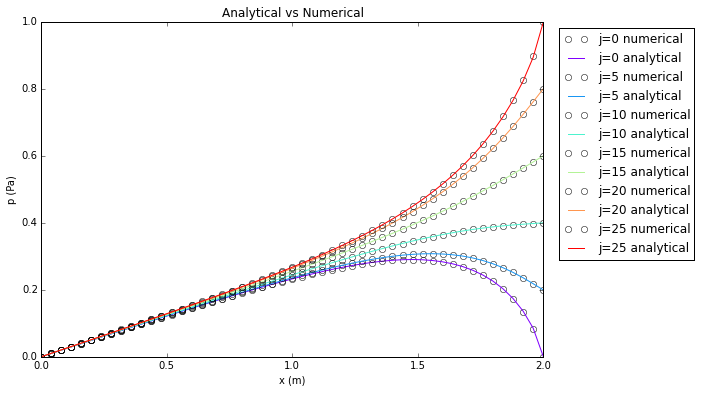

In [10]:
plot_diffusion(p5,p3,x5,26,6793,'Analytical vs Numerical')

## Crank-Nicolson Numerical Scheme

Given:

$$ r = {\Delta t \over {\Delta x^2}} $$

$$ \left( -{r \over 2} \right) u_{i-1}^{n+1} + \left( {1+r} \right) u_i^{n+1} + \left(-{r \over 2} \right) u_{i+1}^{n+1} = \left( {r \over 2} \right) u_{i-1}^n + \left( {1-r} \right) u_i^n + \left( {r \over 2} \right) u_{i+1}^n $$

## Identify Coefficients

$$ a_i = -{r \over 2} $$

$$ b_i = {1+r} $$

$$ c_i = -{r \over 2} $$

$$ d_i =  \left( {r \over 2} \right) u_{i-1}^n + \left( {1-r} \right) u_i^n + \left( {r \over 2} \right) u_{i+1}^n $$

In [11]:
try:
    import numpypy as np # for compatibility with numpy in pypy
except:
    import numpy as np # if using numpy in cpython
 
## Tri Diagonal Matrix Algorithm(a.k.a Thomas algorithm) solver
def TDMAsolver(a, b, c, d):
    '''
    TDMA solver, a b c d can be NumPy array type or Python list type.
    refer to http://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm
    '''
    nf = len(a) # number of equations
    ac, bc, cc, dc = map(np.array, (a, b, c, d)) # copy the array
    for it in xrange(1, nf):
        mc = ac[it]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1]
        dc[it] = dc[it] - mc*dc[it-1]

    xc = ac
    xc[-1] = dc[-1]/bc[-1]

    for il in xrange(nf-2, -1, -1):
        xc[il] = (dc[il]-cc[il]*xc[il+1])/bc[il]

    del bc, cc, dc # delete variables from memory

    return xc 

In [12]:
def crank_nicholson(tmax, nx, xmax, sigma):
    
    from scipy import linalg
    """
    Returns the velocity field and distance for 2D linear convection
    """
    # Increments:
    dx = xmax/(nx-1)
    dt = sigma * dx**2
    nt = int((tmax / dt) - 1)
    
    # Initialise data structures:
    import numpy as np
    from math import pi as PI
    
    u = np.zeros((nx,nt))
    x = np.zeros(nx)

    # Coefficients
    a = np.zeros(nx-2)
    b = np.zeros(nx-2)
    c = np.zeros(nx-2)
    d = np.zeros(nx-2)
    
    #Constants
    r = 0.5

    # X Loop
    for i in range(0,nx):
      x[i] = i*dx

    # Initial conditions
    u[:,0] = np.sin(PI*x / xmax)

    # Dirichlet Boundary Conditions:
    # p boundary, left:
    u[0,:] = 0.0
    # p boundary, right:
    u[nx-1,:] = 0.0 
    
    B1 = 0
    B2 = 0
    
    m=0
    i=1

    for n in range(0,nt-1):
        a[m:nx-2] = - r / 2.0
        b[m:nx-2] = 1.0 + r
        c[m:nx-2] = - r / 2.0
        d[m:nx-2] = ( (r / 2.0) * u[i-1:nx-2, n] +
                      (1 - r) * u[i:nx-1, n] +
                      (r / 2.0) * u[i+1:nx, n] )

        u[i:nx-1, n+1] = TDMAsolver(a, b, c, d)     
            
    return u, x

In [13]:
uu, xx = crank_nicholson(0.1, 101, 1.0, 0.5)

In [14]:
def fourier_equation_analytical(NX, XMAX, T):
    
    from math import pi as PI
    import numpy as np
    
    # Initialise data structures
    u_analytical = np.zeros(NX)
    x = np.zeros(NX)

    # Constants
    DX = XMAX/(NX-1)

    # X Loop
    for i in range(0, NX):
        x[i] = i*DX
  
    for i in range (0, NX):
        u_analytical[i]= ( (np.sin(PI*x[i] / XMAX))*
                            np.exp(-1.0*(PI**2)*T / XMAX**2) )
        
    return u_analytical, x

In [15]:
uuu, xxx = fourier_equation_analytical(101, 1.0, 0.1)

In [16]:
def plot_fourier(u_num,u_ana,x4):
   """
   Plots the 1D velocity field
   """

   import matplotlib.pyplot as plt
   import matplotlib.cm as cm
   plt.figure()
   ax=plt.subplot(111)
   ax.plot(x4,u_num[:, -1],'ko', markerfacecolor='none', alpha=0.5, label='numerical')
   ax.plot(x4,u_ana[:],linestyle='-',c='r',label='analytical')
   box=ax.get_position()
   ax.set_position([box.x0, box.y0, box.width*1.5,box.height*1.5])
   ax.legend( bbox_to_anchor=(1.02,1), loc=2)
   plt.xlabel('x (m)')
   plt.ylabel('u (K)')
   #plt.ylim([0,8.0])
   #plt.xlim([0,2.0*PI])
   #plt.title(TITLE)
   plt.show()

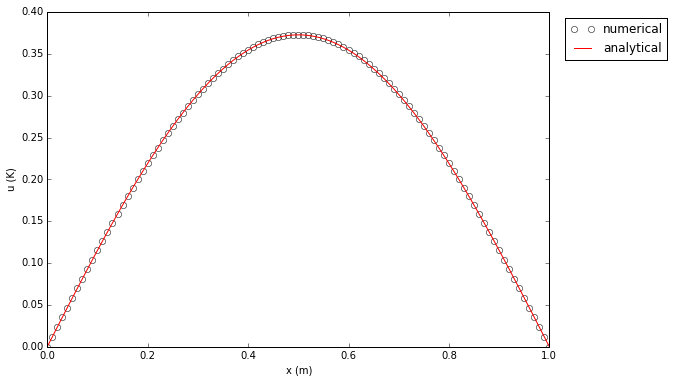

In [17]:
plot_fourier(uu,uuu,xx)